In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Data Disc. and prep.

In [ ]:
pip install pm4py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 385, in run
    conflicts = self

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn
import pm4py
from scipy.stats.mstats import winsorize

In [ ]:
log = pm4py.read_xes('/content/drive/MyDrive/BPI Dataset/Road_Traffic_Fine_Management_Process (1).xes')
df = pm4py.convert_to_dataframe(log)
df

KeyboardInterrupt: ignored

# Data preproc

In [ ]:
df['concept:name'].unique()

array(['Create Fine', 'Send Fine', 'Insert Fine Notification',
       'Add penalty', 'Send for Credit Collection', 'Payment',
       'Insert Date Appeal to Prefecture', 'Send Appeal to Prefecture',
       'Receive Result Appeal from Prefecture',
       'Notify Result Appeal to Offender', 'Appeal to Judge'],
      dtype=object)

In [ ]:
df['case:concept:name']

0            A1
1            A1
2          A100
3          A100
4          A100
          ...  
561465    V9999
561466    V9999
561467    V9999
561468    V9999
561469    V9999
Name: case:concept:name, Length: 561470, dtype: object

In [ ]:
sum(df['case:concept:name'] == "A1")

2

In [ ]:
df['notificationType'] = df['notificationType'].replace('NaN',np.nan)
df['notificationType'].unique()

In [ ]:
pd.unique(df['case:concept:name'])

In [ ]:
df['case:concept:name'].describe()

In [ ]:
pd.to_datetime(df['time:timestamp'],utc=True)

0        2006-07-23 22:00:00+00:00
1        2006-12-04 23:00:00+00:00
2        2006-08-01 22:00:00+00:00
3        2006-12-11 23:00:00+00:00
4        2007-01-14 23:00:00+00:00
                    ...           
561465   2002-09-06 22:00:00+00:00
561466   2002-10-24 22:00:00+00:00
561467   2002-11-03 23:00:00+00:00
561468   2003-01-02 23:00:00+00:00
561469   2004-01-09 23:00:00+00:00
Name: time:timestamp, Length: 561470, dtype: datetime64[ns, UTC]

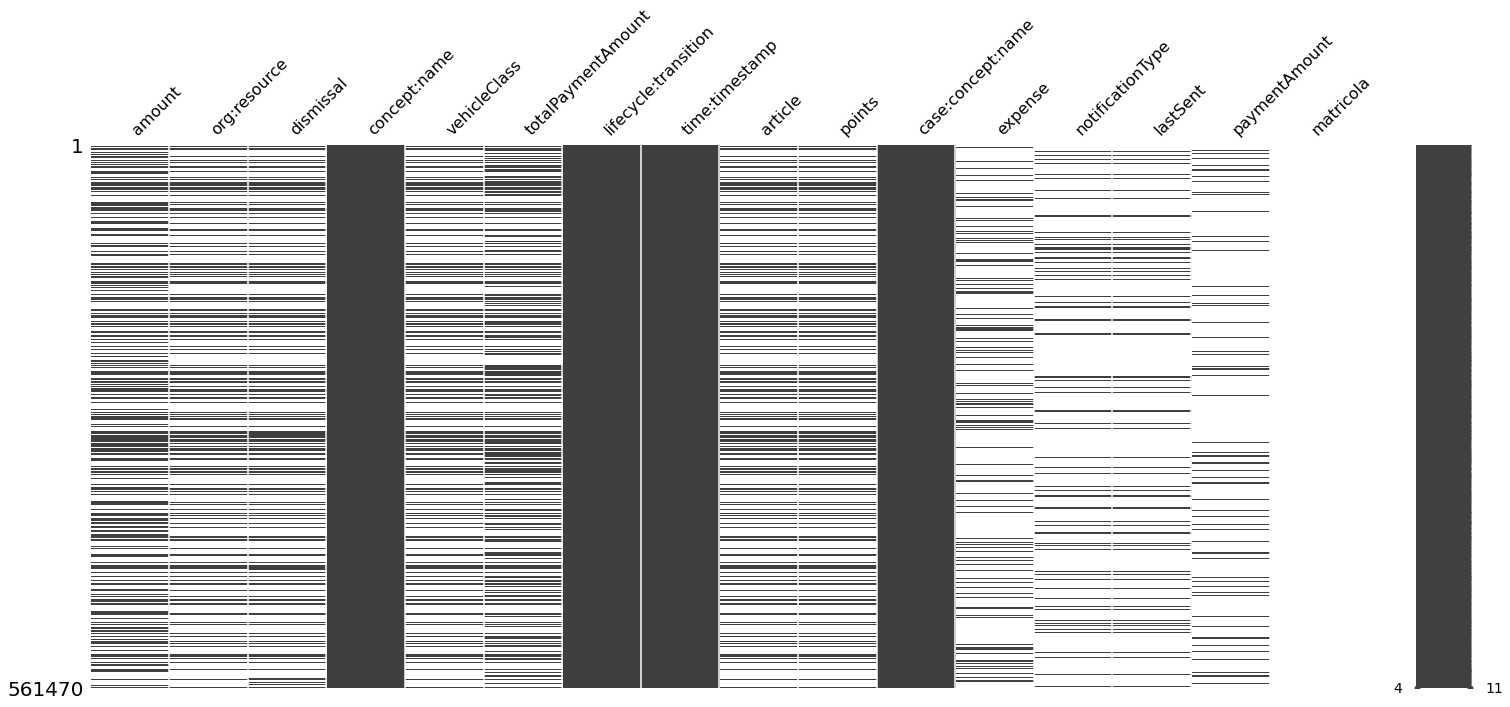

In [ ]:
#find missings
mn.matrix(df)

In [ ]:
#Vehicleclass->Create Fine
df_vehicleclass = df[df['concept:name'] == "Create Fine"]
sns.countplot(x ='vehicleClass', data=df_vehicleclass)

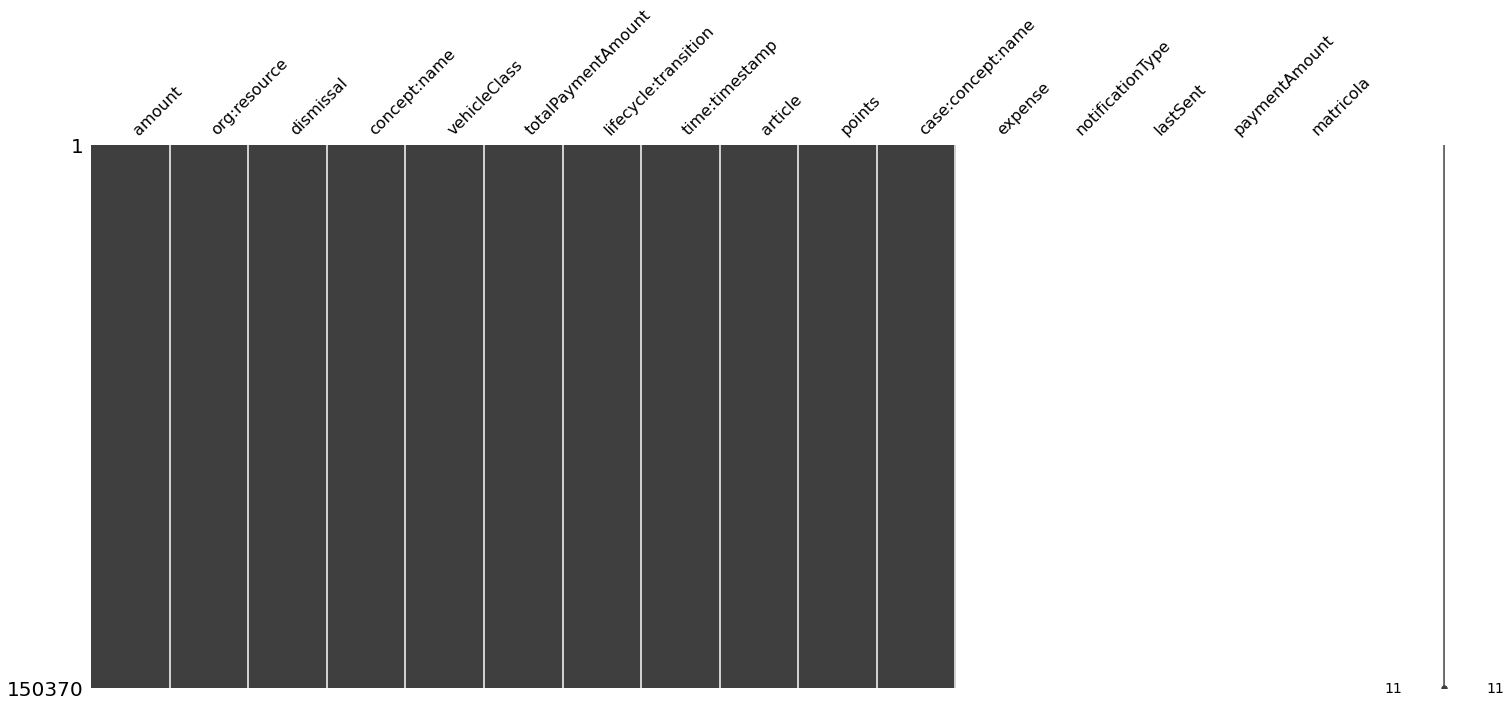

In [ ]:
#find dismidal missings
df['dismissal'].unique()
df.dismissal.isnull()
x = df.loc[~df.dismissal.isnull()]
x['concept:name'].unique()
df_dismissal = df[df['concept:name'] == ("Create Fine" or "Send Appeal to Prefecture" or "Appeal to Judge")]
df_dismissal
mn.matrix(df_dismissal)

In [ ]:
#find article missings
df['article'].unique()
df.article.isnull()
x = df.loc[~df.article.isnull()]
x['concept:name'].unique()
dfarticle = df[df['concept:name'] == ("Create Fine")]
mn.matrix(dfarticle)

In [ ]:
def findactivity(k):
  x = df.loc[~df[k].isnull()]
  f = x['concept:name'].unique()
  h = list(map(lambda x:x,f))
  return h
def showactivity(x):
  dfx = df[df['concept:name'] == (x)]
  return mn.matrix(dfx)

In [ ]:
df.head()

In [ ]:
findactivity("amount")

In [ ]:
showactivity('Create Fine'or 'Add penalty')

# Finding Outliers

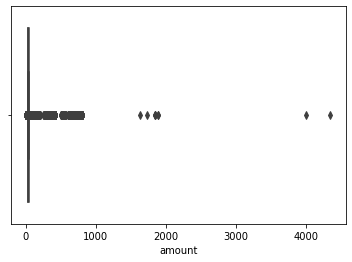

In [ ]:
findactivity("amount")
sns.boxplot(x="amount",data=df[(df['concept:name'] == ('Create Fine' or 'Add penalty'))])

In [ ]:
#Outer fences of the variable CRIM
def fences(df, variable_name):    
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(df[df['concept:name'] == ('Create Fine' or 'Add penalty')], 'amount')
print('Lower end outer fence: ', outer_fence_le)
print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  17.19999999999999
Upper end outer fence:  53.60000000000001


In [ ]:
xd = df[df['concept:name'] == ('Create Fine' or 'Add penalty')]

In [ ]:
xd['amount'] = winsorize(xd['amount'].values, limits = [0, 0.09]).data

In [ ]:
sns.boxplot(x='amount',data = xd)

In [ ]:
sns.displot(xd, x="amount",bins = 10)
sns.displot(df, x="amount",bins = 5)

In [ ]:
findactivity("notificationType")
showactivity('Insert Fine Notification')

In [ ]:
findactivity("expense")

In [ ]:
xf = df[df['concept:name'] == ('Send Fine')]
xfa = df[df['concept:name'] == ('Send Fine')]
xfa2 = df[df['concept:name'] == ('Send Fine')]

In [ ]:
fences(xf,'expense')

(-0.5, 24.0)

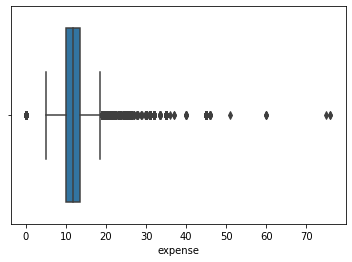

In [ ]:
#sns.boxplot(x='expense',data = xf)
fences(xf,'expense')
sns.boxplot(x='expense',data = xf[xf['expense']<24.0])

In [ ]:
zzz = df['case:concept:name'].unique()
len(zzz)

In [ ]:
xfa2 = xf[xf['expense']>24]
zz = xfa2['case:concept:name'].unique()
len(zz)

In [ ]:
xfa['expense'] = winsorize(xf['expense'].values, limits = [0, 0.09]).data
sns.boxplot(x='expense',data = xfa)

In [ ]:
findactivity("article")
xa = df[df['concept:name'] == ('Create Fine')]
xa.article = xa.article.astype(str)
uxa =xa.article.unique()
plt.figure(figsize=(50,8))
sns.countplot(x="article",data=xa[xa["article"]!=('7.0' and '157.0' and '158.0')])



# Data dic

In [ ]:
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer
# process mining 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
# viz
from pm4py.visualization.petrinet import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization
# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
from pm4py.algo.filtering.log.start_activities import start_activities_filter
from pm4py.algo.filtering.log.end_activities import end_activities_filter
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.log import case_statistics

In [ ]:
variants = variants_filter.get_variants(log)  
print(f"We have:{len(variants)} variants in our log")

In [ ]:
variants_count = case_statistics.get_variant_statistics(log)
variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)
variants_count

In [ ]:
from pm4py.algo.filtering.log.attributes import attributes_filter
activities = attributes_filter.get_attribute_values(log, "concept:name")
activities
max(activities, key=activities.get)

In [ ]:
activities2 = attributes_filter.get_attribute_values(log, "case:concept:name")
activities2
max(activities2, key=activities2.get)

In [ ]:
sum(activities2.values()) / len(activities2)

3.7339229899581032

# PM TO DM :)

In [ ]:
ca = df['case:concept:name'].unique()
l = {}
for i in ca:
  l[i] = []
  
for i,j in zip(df['case:concept:name'],df['concept:name']):
   l[i].append(j)

In [ ]:
df2 = pd.DataFrame()

In [ ]:
xfg = df['concept:name'].unique()
lam = {}
for i in xfg:
  lam[i] = {}

df4 = pd.DataFrame(lam)

In [ ]:
lfp = {}
for i in df:
  lfp[i] = {}
df5 = pd.DataFrame(lfp)

In [ ]:
df2['caseid'] = df['case:concept:name'].unique()
df3 = pd.concat([df2,df5,df4],axis=1)

In [ ]:
dx_dic = {}
for col in df3.columns:
    dx_dic[col] = df3.columns.get_loc(col)

The code below needs a lot of runtime so we cant easily get what we want from it

In [ ]:
for i in df3['caseid']:
  lis = list(df['concept:name'].unique())
  for j in l[i]:
    v = int(np.where(df3["caseid"] == i)[0])
    b = dx_dic[j]
    df3.iloc[v,b] = 1
    try:
      lis.remove(j)
    except:
      pass
  for j in lis:
    b = dx_dic[j]
    df3.iloc[v,b]  = 0  


so what we do is to split the dataframe into 10 pieces and then compile all of them

In [ ]:
z = [1,2,3,4,5,6,7,8,9,10]
for i in z:
  if i == 1 :
    k = int(df3.shape[0]/10)
    exec(f'dft{i} = df3.iloc[:k,]')
  else:
    k = int(df3.shape[0]/10 * (i-1))
    f = int(df3.shape[0]/10 * i)
    exec(f'dft{i} = df3.iloc[k:f,]')

In [ ]:
dft_samp = []
z = [1,2,3,4,5,6,7,8,9,10]
z_new = [6,7,8,9,10]
for i in z_new: 
  dft_samp.append(f'dft{i}')

In [ ]:
"dft{0}".format(i)

In [ ]:
dx_dic = {}
for col in df3.columns:
    dx_dic[col] = df3.columns.get_loc(col)

In [ ]:
for h in dft_samp :
  i_df = globals()[h]
  for i in i_df['caseid']:
    lis = list(df['concept:name'].unique())
    for j in l[i]:
        v = int(np.where(i_df["caseid"] == i)[0])
        b = dx_dic[j]
        i_df.iloc[v,b] = 1
        try:
          lis.remove(j)
        except:
            pass
    for j in lis:
      b = dx_dic[j]
      i_df.iloc[v,b]  = 0
  i_df.to_csv("/content/drive/MyDrive/BPI Dataset/DFS/"+str(h)+".csv")  

Now we concat them together again.

In [ ]:
dfh_samp = []
for i in z: 
  dfh_samp.append(f'dfh{i}')
for i in z:
  exec(f'dfh{i} = pd.read_csv("/content/drive/MyDrive/BPI Dataset/DFS/dft"+str(i)+".csv")')

In [ ]:
dforg = pd.concat([dfh1,dfh2,dfh3,dfh4,dfh5,dfh6,dfh7,dfh8,dfh9,dfh10])

In [ ]:
dforg.to_csv("/content/drive/MyDrive/BPI Dataset/DFS/dforg.csv")

In [ ]:
dforg = pd.read_csv("/content/drive/MyDrive/BPI Dataset/DFS/dforg.csv")

In [ ]:
dforg = dforg.set_index('index')

In [ ]:
dforg["index"] = dforg["Unnamed: 0"]

In [ ]:
dforg = dforg.set_index('index')

In [ ]:
dforg = dforg.drop(['Unnamed: 0', 'lifecycle:transition' , 'case:concept:name' , 'amount', 'concept:name'], axis=1)

Now lets go do the logic for the rest of the columns.

In [ ]:
dforg.head()

,caseid,org:resource,dismissal,vehicleClass,totalPaymentAmount,time:timestamp,article,points,expense,notificationType,...,Send Fine,Insert Fine Notification,Add penalty,Send for Credit Collection,Payment,Insert Date Appeal to Prefecture,Send Appeal to Prefecture,Receive Result Appeal from Prefecture,Notify Result Appeal to Offender,Appeal to Judge
index,,,,,,,,,,,,,,,,,,,,,
0,A1,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A100,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A10000,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,A10001,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,A10004,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dic_for_res = {}

for i in ca:
  dic_for_res[i] = []

In [ ]:
from numpy import nan

In [ ]:
for i,j in zip(df['case:concept:name'],df['org:resource']):
  if pd.isnull(j) == False :
    dic_for_res[i].append(j)

In [ ]:
xvb = df['org:resource'].dropna().unique().tolist()

In [ ]:
dx_dic = {}
for col in dforg:
    dx_dic[col] = dforg.columns.get_loc(col)

In [ ]:
dx_dic["org:resource"]

In [ ]:
for i in dforg['caseid']:
  for j in dic_for_res[i]:
    v = int(np.where(dforg["caseid"] == i)[0])
    dforg.iloc[v,1] = j

In [ ]:
dforg

Now lets get every case duration time so we fill our next column ;)

In [ ]:
from pm4py.statistics.traces.generic.log import case_statistics
median_case_duration = case_statistics.get_median_caseduration(log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"
})

In [ ]:
from pm4py.statistics.traces.generic.log import case_statistics
all_case_durations = case_statistics.get_all_casedurations(log, parameters={
    case_statistics.Parameters.TIMESTAMP_KEY: "time:timestamp"})

In [ ]:
all_case_durations

In [ ]:
max(all_case_durations)

377740800.0

In [ ]:
from pm4py.statistics.traces.generic.log import case_arrival
case_arrival_ratio = case_arrival.get_case_arrival_avg(log, parameters={
    case_arrival.Parameters.TIMESTAMP_KEY: "time:timestamp"})

In [ ]:
## Import the alpha_miner algorithm
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
net, initial_marking, final_marking = alpha_miner.apply(log)
## Import the petrinet visualizer object
from pm4py.visualization.petrinet import visualizer as pn_visualizer
# Visualise 
gviz = pn_visualizer.apply(net, initial_marking, final_marking) 
pn_visualizer.view(gviz)

In [ ]:
gviz = pn_visualizer.apply(net, initial_marking, final_marking,variant=pn_visualizer.Variants.FREQUENCY, log=log)
pn_visualizer.view(gviz)

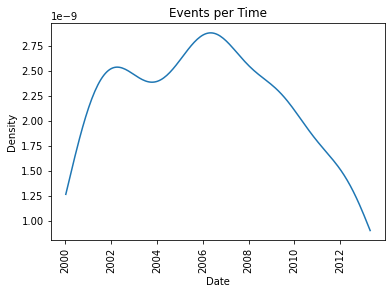

In [ ]:
from pm4py.algo.filtering.log.attributes import attributes_filter

x, y = attributes_filter.get_kde_date_attribute(log, attribute="time:timestamp")

from pm4py.visualization.graphs import visualizer as graphs_visualizer

gviz = graphs_visualizer.apply_plot(x, y, variant=graphs_visualizer.Variants.DATES)
graphs_visualizer.view(gviz)

In [ ]:
from pm4py.statistics.eventually_follows.log import get as efg_get
efg_graph = efg_get.apply(log)
print(efg_graph)

In [ ]:
df["concept:name"].unique()

array(['Create Fine', 'Send Fine', 'Insert Fine Notification',
       'Add penalty', 'Send for Credit Collection', 'Payment',
       'Insert Date Appeal to Prefecture', 'Send Appeal to Prefecture',
       'Receive Result Appeal from Prefecture',
       'Notify Result Appeal to Offender', 'Appeal to Judge'],
      dtype=object)

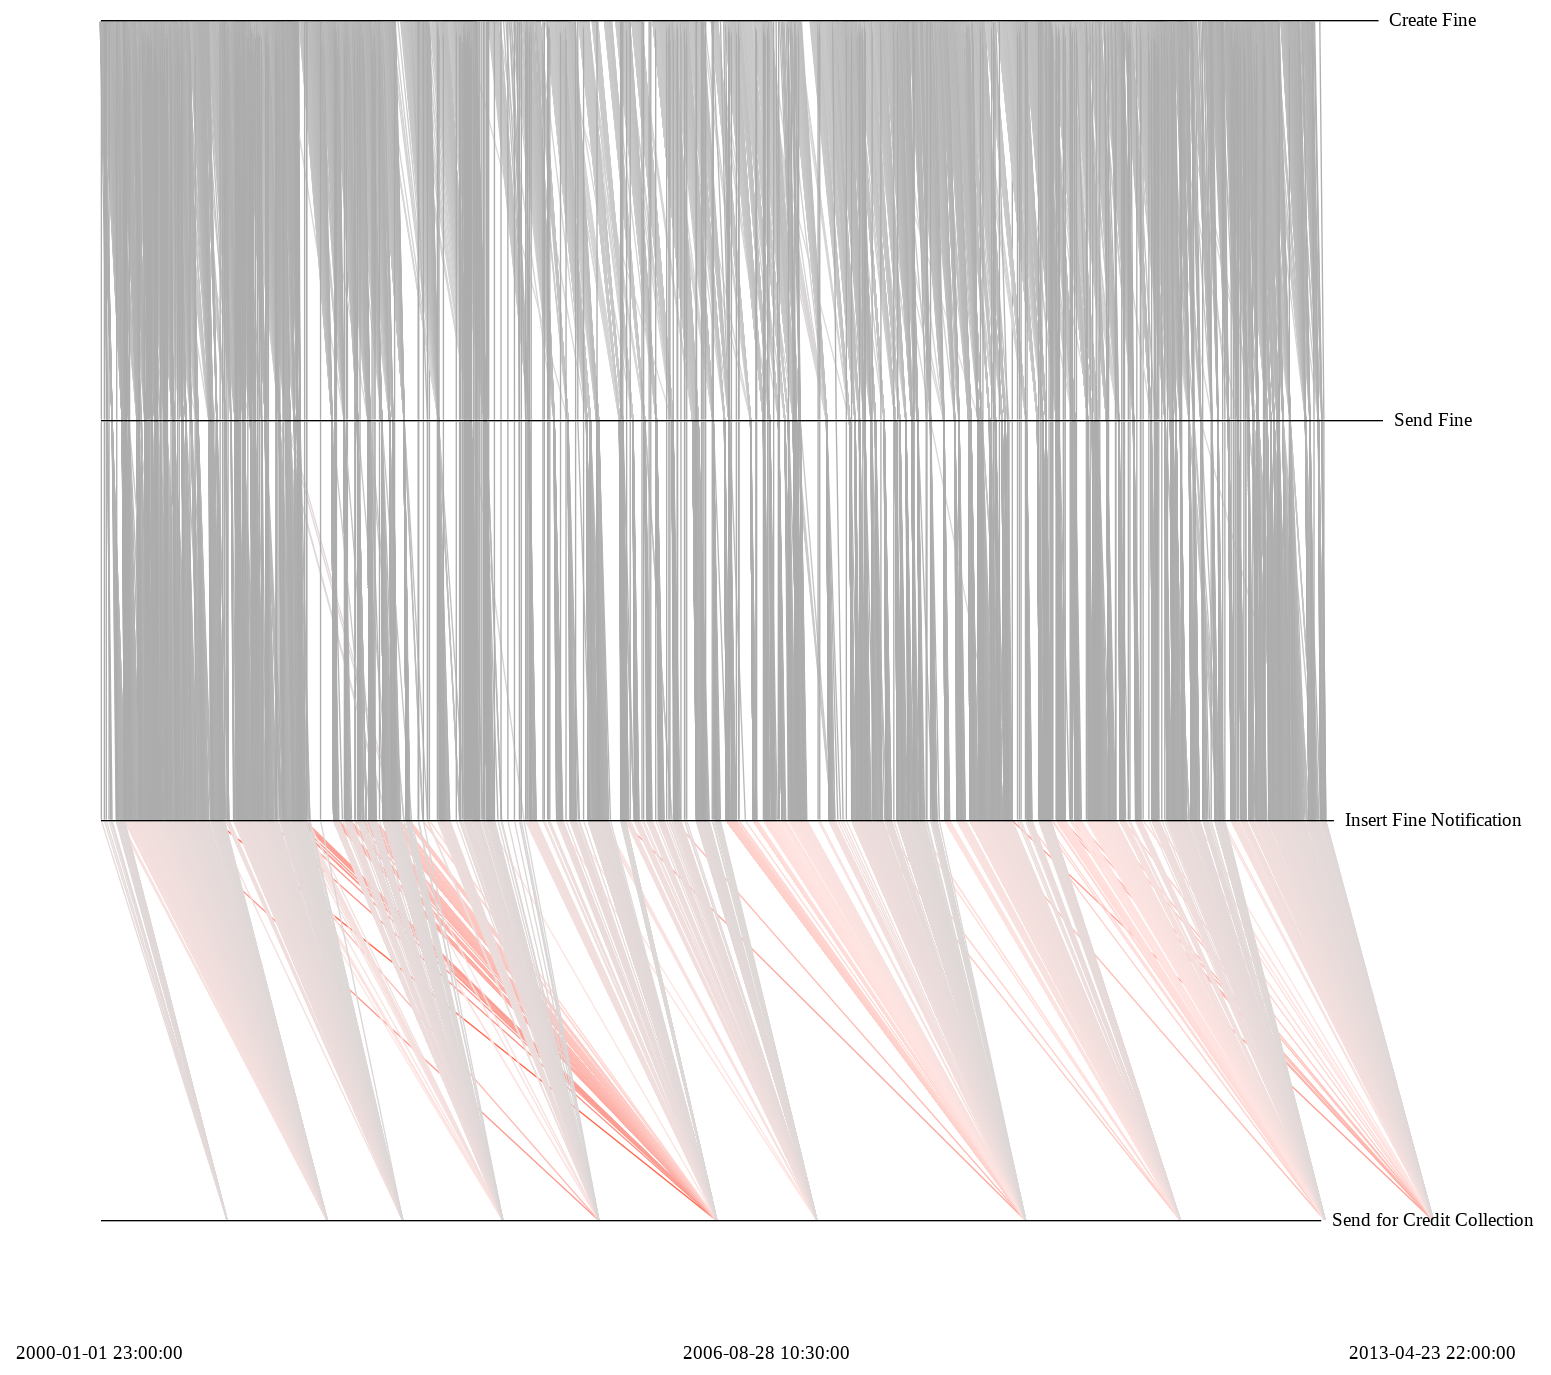

In [ ]:
pm4py.view_performance_spectrum(log, ["Create Fine" , "Send Fine" , "Insert Fine Notification", "Send for Credit Collection"], format="png")